<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/8_2_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train_shape (60000, 28, 28)
y_train_shape (60000,)
x_test_shape (10000, 28, 28)
y_test_shape (10000,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8878 - loss: 0.4047 - precision_2: 0.9358
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9738 - loss: 0.0876 - precision_2: 0.9784
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9841 - loss: 0.0530 - precision_2: 0.9862
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9900 - loss: 0.0316 - precision_2: 0.9912
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9911 - loss: 0.0265 - precision_2: 0.9920
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0834 - precision_2: 0.9789
Test score(loss): 0.06849883496761322
Test accuracy(accuracy): 0.9800999760627747
Test prescision( prescision): 0.9820389151573181
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

predicted_classes length =  10000 
predicted_classes= [7 2 1 ... 4 5 6]

correct_indices length =  9801 
correct_indices= [   0    1    2 ... 9997 9998 9999]

incorrect_indices length =  1

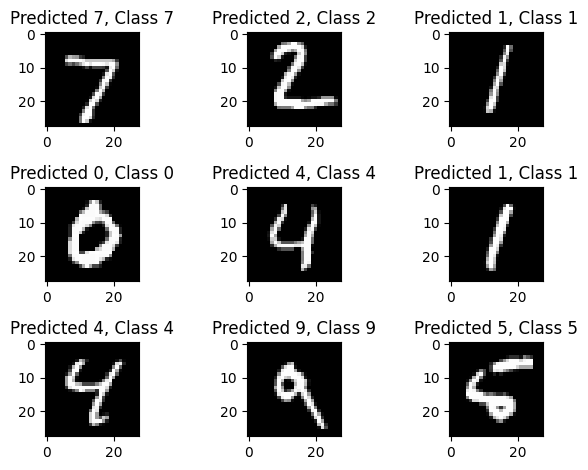

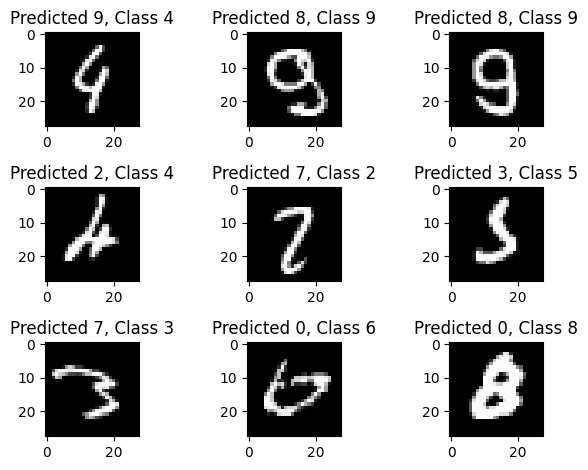

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train_shape', x_train.shape)
print('y_train_shape', y_train.shape)
print('x_test_shape', x_test.shape)
print('y_test_shape', y_test.shape)

X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

"""
to_categorical: Keras의 유틸리티 함수로, 정수 레이블을 원-핫 인코딩 형태로 변환합니다.
원-핫 인코딩은 각 클래스를 이진 벡터로 표현하는 방법입니다.
예를 들어, 클래스 0은 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 클래스 1은 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]와 같이 표현됩니다.
"""
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision()])
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1) #epochs 값을 1부터 증가하면서 보면 Incorrect_indices가 줄어드는 것을 알수있음

score = model.evaluate(X_test, Y_test)
print('Test score(loss):', score[0])
print('Test accuracy(accuracy):', score[1])
print('Test prescision( prescision):', score[2])

# test data shape이 (10000, 10) 즉 1만개 샘플중 0~9까지 데이터로 구성된 데아터의 확률값중 가장 큰값(argmax)을 선택
"""
예를들면 []
 [0.1, 0.7, 0.2],
 [0.3, 0.4, 0.3],
 [0.2, 0.2, 0.6],
 [0.9, 0.05, 0.05],
 [0.4, 0.1, 0.5]

 argmax --> [1, 1, 2, 0, 2]
"""
predicted_classes = np.argmax(model.predict(X_test), axis=1) # axis=1 일때는 각 행(샘플)에 대해 가장 높은 확률을 가진 클래스 인덱스를 찾습니다.
print("\npredicted_classes length = ", len(predicted_classes), "\npredicted_classes=", predicted_classes)

"""
- predicted_classes == y_test는 두 배열을 비교하여 요소별로 True 또는 False를 반환합니다.
  True는 예측이 실제 값과 일치할 때 나타납니다.
- np.nonzero(...)는 배열에서 True인 요소의 인덱스를 반환합니다.
- [0]는 이 결과에서 첫 번째 차원에 해당하는 인덱스 값들만 선택합니다
"""
correct_indices = np.nonzero(predicted_classes == y_test)[0]
print("\ncorrect_indices length = ", len(correct_indices), "\ncorrect_indices=", correct_indices)

"""
1. np.nonzero() --> True인 위치(= 틀린 예측)의 인덱스를 반환합니다.
   다만, 항상 튜플로 반환됩니다!
   예) np.nonzero([False, True, False, True]) --> 결과: (array([1, 3]),)
2. [0]의 의미
   위 결과는 튜플 (array([1, 3]),)입니다.
   여기서 array([1, 3])만 꺼내려면 [0]이 필요합니다.

[0]의 의미
np.nonzero()는 결과를 튜플로 반환하는데, 이 튜플은 각 차원의 인덱스를 포함합니다.
predicted_classes == y_test는 1차원 배열이므로, 반환값은 (array([0, 2, 3, 4]),)와 같은 형태가 됩니다.
[0]을 추가하면 튜플에서 첫 번째 요소인 인덱스 배열만 추출합니다. 이 부분은 실제로 일치하는 인덱스들만 담고 있는 1차원 배열을 가져오게 됩니다.
"""
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("\nincorrect_indices length = ", len(incorrect_indices), "\nicorrect_indices=", incorrect_indices)

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()



In [ ]:
import numpy as np

predicted_classes = np.array([1, 2, 1, 0, 2])
y_test = np.array([1, 0, 1, 0, 1])

# 예측과 실제 값이 일치하는 인덱스 찾기
correct_indices = np.nonzero(predicted_classes == y_test)[0]
print(correct_indices)


[0 2 3]
